# Dimensionality reduction of 2018-2019 NBA regular season data to find the largest sources of variance between players.

### Module versions used in this notebook

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn


print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.20.2


In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

### Use pandas to read the csv and create a dataframe

In [3]:
df = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/Unsupervised/PrincipalComponentAnalysis/NBA_PCA/season_data_2018_2019.csv")

### Putting some requirements on the players that are being considered (otherwise, false sources of variance are introduced into the data). Only want players that contribute suffiently in terms of playing time.

In [4]:
df = df.drop_duplicates(keep = 'first')
df = df[df['G'] > 50]
df = df[df['MP'] > 15]
df = df.dropna()

names = df['Player']
df = df.drop(columns = ['Rk', 'Player', 'Pos', 'Tm', 'Age'])
features = df

In [5]:
features.head(3)

,G,GS,MP,FG,FGA,FGP,Three_P,Three_PA,Three_PP,Two_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,80,80,33.4,6.0,10.1,0.595,0.0,0.0,0.000,6.0,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,82,28,23.3,3.4,5.9,0.576,0.0,0.2,0.200,3.4,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
7,81,81,33.2,8.4,16.3,0.519,0.1,0.5,0.238,8.3,...,0.847,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3


In [6]:
names.head(3)

3         Steven Adams\adamsst01
4          Bam Adebayo\adebaba01
7    LaMarcus Aldridge\aldrila01
Name: Player, dtype: object

### Convert dataframe to numpy array

In [7]:
X = features.values
y = names.values

In [8]:
print('Features array:')
print(X)
print('')
print('Names array:')
print(y)

Features array:
[[80.  80.  33.4 ...  1.7  2.6 13.9]
 [82.  28.  23.3 ...  1.5  2.5  8.9]
 [81.  81.  33.2 ...  1.8  2.2 21.3]
 ...
 [75.  13.  22.7 ...  1.   1.4  8.7]
 [81.  81.  30.7 ...  1.5  2.4 12.6]
 [81.  81.  30.9 ...  3.8  1.7 19.1]]

Names array:
['Steven Adams\\adamsst01' 'Bam Adebayo\\adebaba01'
 'LaMarcus Aldridge\\aldrila01' 'Jarrett Allen\\allenja01'
 'Al-Farouq Aminu\\aminual01' 'Giannis Antetokounmpo\\antetgi01'
 'OG Anunoby\\anunoog01' 'Ryan Arcidiacono\\arcidry01'
 'Trevor Ariza\\arizatr01' 'D.J. Augustin\\augusdj01'
 'Deandre Ayton\\aytonde01' 'Marvin Bagley\\baglema01'
 'Harrison Barnes\\barneha02' 'Nicolas Batum\\batumni01'
 'Aron Baynes\\baynear01' 'Kent Bazemore\\bazemke01'
 'Bradley Beal\\bealbr01' 'Malik Beasley\\beaslma01'
 'Marco Belinelli\\belinma01' "DeAndre' Bembry\\bembrde01"
 'Davis Bertans\\bertada01' 'Patrick Beverley\\beverpa01'
 'Nemanja Bjelica\\bjeline01' 'Eric Bledsoe\\bledser01'
 'Bogdan Bogdanovic\\bogdabo01' 'Bojan Bogdanovic\\bogdabo02'
 'De

### Use standardscaler to scale data and prepare data for PCA

In [9]:
X = StandardScaler().fit_transform(X)
print(X)

[[ 1.06525373  1.360849    1.31478409 ...  0.27782005  0.83250762
   0.25745089]
 [ 1.28295769 -0.43168767 -0.45840874 ...  0.02811558  0.65560819
  -0.59854065]
 [ 1.17410571  1.39532085  1.27967136 ...  0.40267229  0.1249099
   1.52431837]
 ...
 [ 0.52099383 -0.94876555 -0.56374693 ... -0.5961456  -1.29028554
  -0.63278031]
 [ 1.17410571  1.39532085  0.84076224 ...  0.02811558  0.47870876
   0.03489309]
 [ 1.17410571  1.39532085  0.87587497 ...  2.89971701 -0.75958725
   1.14768209]]


### Choosing 2 principal components for now for the ease of plotting and identifying overall patterns

In [10]:
pca = PCA(n_components = 2)

In [11]:
df = pd.read_csv("/Users/tommykwan/Documents/MachineLearning/Unsupervised/PrincipalComponentAnalysis/NBA_PCA/season_data_2018_2019.csv")

start = time.time()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

end = time.time()

In [12]:
print('Total fit time: ' + str(end-start) + ' seconds')

Total fit time: 0.009920597076416016 seconds


### Concatenate principal components with player names for dataframe visualization

In [13]:
finalDf = pd.concat([principalDf, df[['Player']]], axis = 1)
finalDf.head(3)

,PC1,PC2,Player
0,3.788657,7.051327,Alex Abrines\abrinal01
1,0.212400,4.515843,Quincy Acy\acyqu01
2,5.583328,2.929770,Jaylen Adams\adamsja01


### Interesting results from PCA with two components:

### On the far right, there is a cluster of high efficiency forwards such as Antetokounmpo and Embiid

### On the top, there is a cluster of big men who are not stars but are 'serviceable' such as Davis and Drummond who have a high rebounding percentage - rebounds makes sense as a source of high variance 

### High usage players such as Westbrook and Harden (and mostly guards) appear on the bottom right and it makes sense that usage is a source of high variance in the data throughout the positions

### Generally, the two 'clusters' can be seen to be big men (efficient) and guards (high usage)

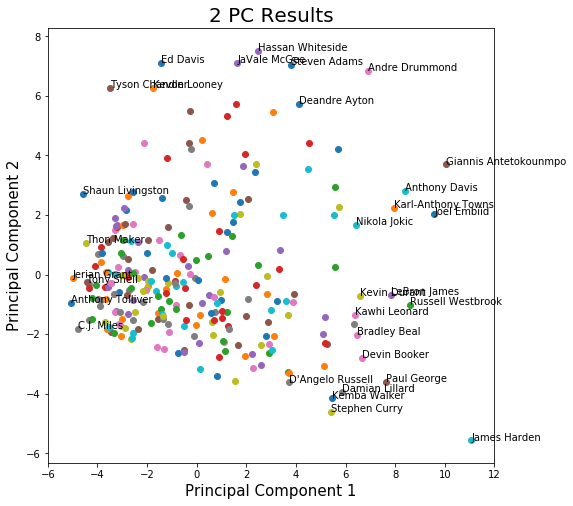

In [14]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot()

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 PC Results', fontsize = 20)

percentilePC1High = np.percentile(principalComponents[:,0],95)
percentilePC2High = np.percentile(principalComponents[:,1],97)
percentilePC1Low = np.percentile(principalComponents[:,0],2)
percentilePC2Low = np.percentile(principalComponents[:,1],2)

for i in range(len(principalComponents)):
    ax.scatter(principalComponents[i][0],principalComponents[i][1])
    if principalComponents[i][0] > percentilePC1High or principalComponents[i][1] > percentilePC2High or principalComponents[i][0] < percentilePC1Low or principalComponents[i][1] < percentilePC2Low:
            txt = names.values[i].split('\\')[0]
            ax.annotate(txt,[principalComponents[i][0],principalComponents[i][1]],rotation = 0)


In [15]:
### Percentage of variance explained with 2 principal components

Text(0.5, 1.0, 'Cumulative variance explained')

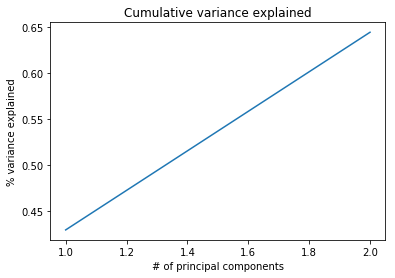

In [16]:
ax = plt.subplot()
ax.plot([1,2],np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('# of principal components')
ax.set_ylabel('% variance explained');
ax.set_title('Cumulative variance explained')

### Create a new PCA model with 3 principal components to see how the results change

In [17]:
pca = PCA(n_components = 3)

In [18]:
start = time.time()

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])


end = time.time()


In [19]:
print('Total fit time: ' + str(end-start) + ' seconds')

Total fit time: 0.005054950714111328 seconds


Text(0.5, 1.0, 'Cumulative variance explained')

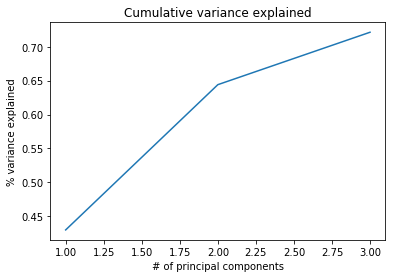

In [20]:
ax = plt.subplot()
ax.plot([1,2,3],np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('# of principal components')
ax.set_ylabel('% variance explained');
ax.set_title('Cumulative variance explained')

### Inserting a third dimension does not provide much more information as seen below. There are still the same groupings as the two principal components version. Most of the variance (over 70%) can be explained using 3 principal components.

### Note: use %matplotlib notebook in order to view the 3D graph interactively!

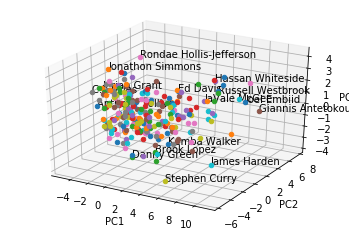

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# use %matplotlib notebook for interactive 3D plot
# %matplotlib notebook

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')

ax3D.set_xlabel('PC1')
ax3D.set_ylabel('PC2')
ax3D.set_zlabel('PC3')


percentilePC1High = np.percentile(principalComponents[:,0],99)
percentilePC2High = np.percentile(principalComponents[:,1],99)
percentilePC3High = np.percentile(principalComponents[:,2],99)
percentilePC1Low = np.percentile(principalComponents[:,0],1)
percentilePC2Low = np.percentile(principalComponents[:,1],1)
percentilePC3Low = np.percentile(principalComponents[:,2],1)

for i in range(len(principalComponents)):
    ax3D.scatter(principalComponents[i][0],principalComponents[i][1],principalComponents[i][2])
    if principalComponents[i][0] > percentilePC1High or principalComponents[i][1] > percentilePC2High or principalComponents[i][0] < percentilePC1Low or principalComponents[i][1] < percentilePC2Low or principalComponents[i][2] > percentilePC3High or principalComponents[i][2] < percentilePC3Low:
            txt = names.values[i].split('\\')[0]
            ax3D.text(principalComponents[i][0],
                       principalComponents[i][1],
                      principalComponents[i][2],
                      txt,
                      None)
            


### Explained variance percentage with 3 principal components

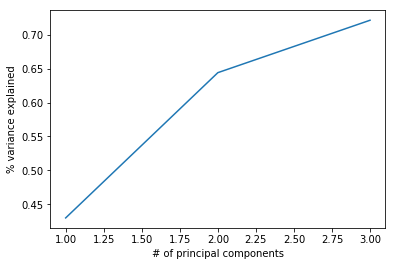

In [22]:
ax = plt.subplot()
ax.plot([1,2,3],np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('# of principal components')
ax.set_ylabel('% variance explained');

### In order to explain 95% of the variance, 11 principal components are needed (but unvisualizable): 

In [23]:
pca = PCA(.95)
principalComponents = pca.fit_transform(X)

In [24]:
print('# of principal components needed for 95% variance explained: ')
print((principalComponents.shape)[1])

# of principal components needed for 95% variance explained: 
11


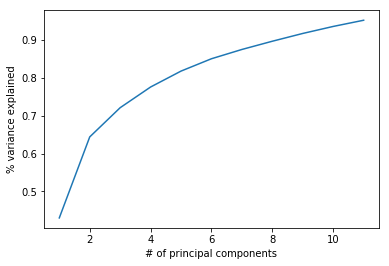

In [25]:
ax = plt.subplot()
ax.plot([1,2,3,4,5,6,7,8,9,10,11],np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('# of principal components')
ax.set_ylabel('% variance explained');